In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
df = pd.read_excel(r'C:\Users\knayl\OneDrive\Portfolio Projects\SQL+Python+POwerBI\Risk_Analyst\Insurance Risk & Claims Analysis\insurance_policies_data.xlsx')

In [8]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (37542, 16)


In [10]:
print("\nColumns:", df.columns.tolist())


Columns: ['ID', 'BirthDate', 'Car Color', 'Car Make', 'Car Model', 'Car Use', 'Car Year', 'Coverage Zone', 'Education', 'Gender', 'Marital Status', 'Parent', 'Claim Amount', 'Claim Freq', 'Household Income', 'Kids Driving']


In [12]:
print("\nData types:\n", df.dtypes)


Data types:
 ID                          object
BirthDate           datetime64[ns]
Car Color                   object
Car Make                    object
Car Model                   object
Car Use                     object
Car Year                     int64
Coverage Zone               object
Education                   object
Gender                      object
Marital Status              object
Parent                      object
Claim Amount               float64
Claim Freq                   int64
Household Income           float64
Kids Driving                 int64
dtype: object


In [14]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 ID                  0
BirthDate           0
Car Color           0
Car Make            0
Car Model           0
Car Use             0
Car Year            0
Coverage Zone       0
Education           0
Gender              0
Marital Status      0
Parent              0
Claim Amount        0
Claim Freq          0
Household Income    0
Kids Driving        0
dtype: int64


In [18]:
current_year = datetime.now().year
df['Age'] = current_year - pd.to_datetime(df['BirthDate']).dt.year

In [20]:
df['Car Age'] = current_year - df['Car Year']

In [24]:
df['Claim Severity'] = np.where(df['Claim Freq'] > 0, df['Claim Amount'] / df['Claim Freq'], 0)

In [26]:
df['Risk Category'] = pd.cut(df['Claim Freq'], 
                            bins=[-1, 0, 1, 2, 100], 
                            labels=['No Claims', 'Low Risk', 'Medium Risk', 'High Risk'])

In [30]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Numerical variables summary
num_cols = ['Age', 'Household Income', 'Claim Amount', 'Claim Freq', 'Car Age']
print(df[num_cols].describe())

                Age  Household Income  Claim Amount    Claim Freq  \
count  37542.000000      37542.000000  37542.000000  37542.000000   
mean      46.153721     147247.407750   5002.851410      0.510308   
std       15.295082      59145.588886   2870.651799      1.015050   
min       20.000000      45004.910000      0.004000      0.000000   
25%       33.000000      96162.182500   2543.940750      0.000000   
50%       46.000000     146674.895000   4945.589000      0.000000   
75%       59.000000     198277.420000   7497.492750      1.000000   
max       73.000000     249991.110000   9999.770000      4.000000   

            Car Age  
count  37542.000000  
mean      17.706995  
std        9.045441  
min        5.000000  
25%       11.000000  
50%       16.000000  
75%       23.000000  
max      109.000000  


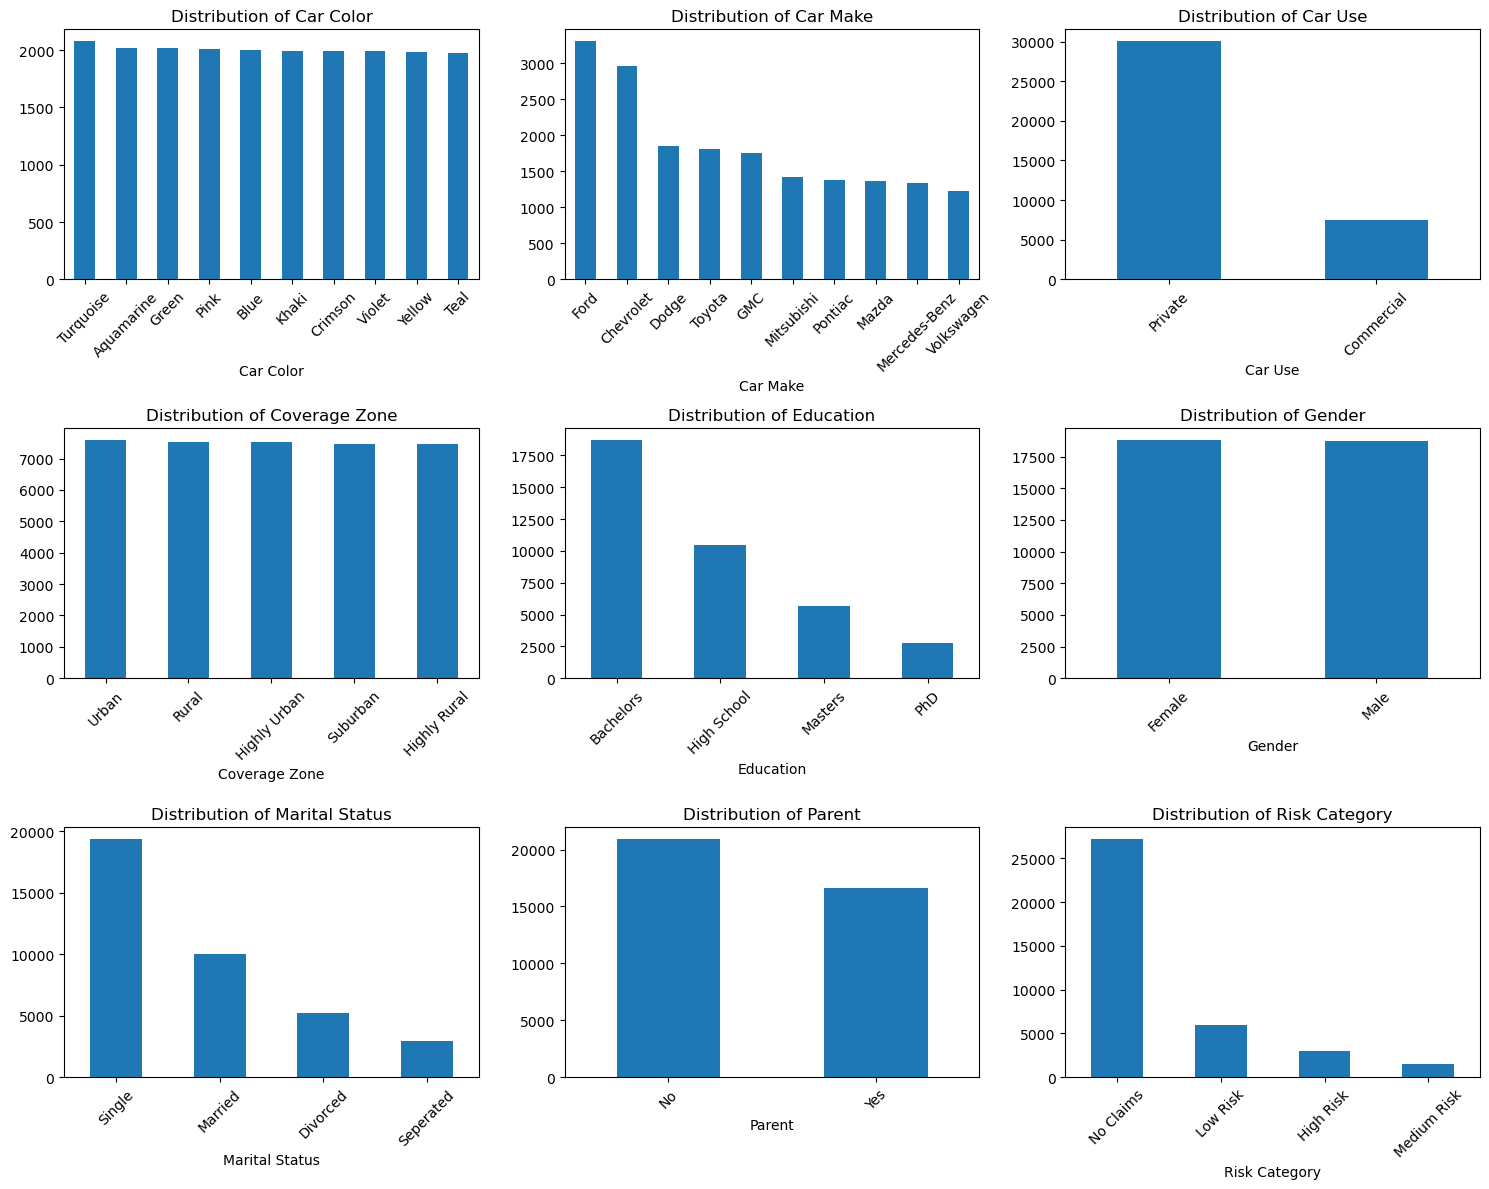

In [34]:
cat_cols = ['Car Color', 'Car Make', 'Car Use', 'Coverage Zone', 'Education', 
           'Gender', 'Marital Status', 'Parent', 'Risk Category']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(cat_cols[:9]):
    df[col].value_counts().head(10).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

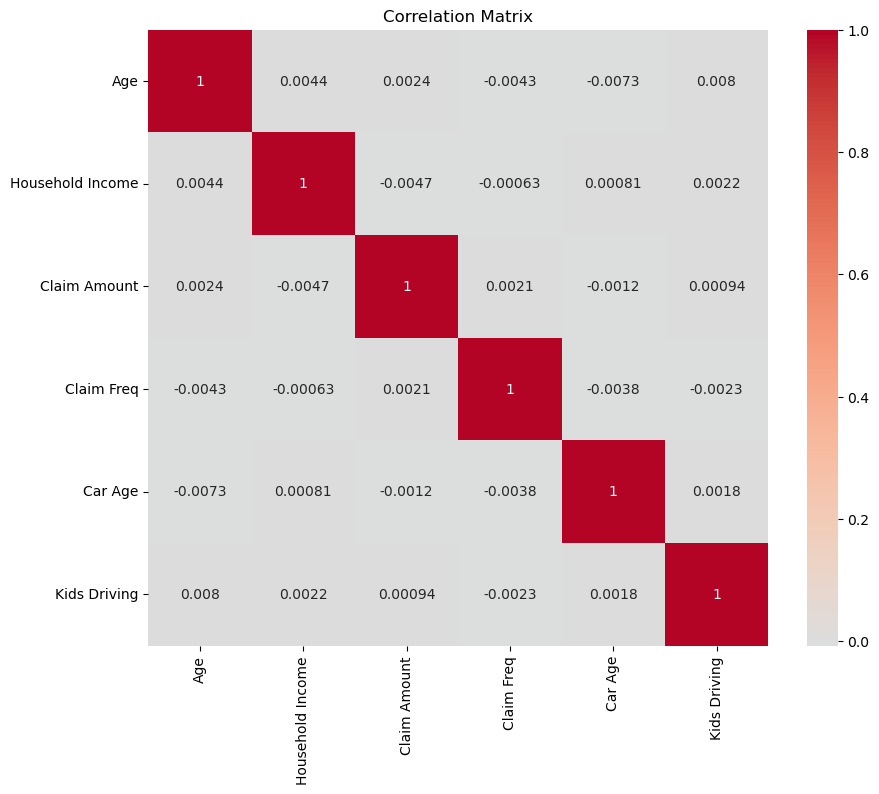

In [38]:
# Bivariate Analysis
corr_matrix = df[['Age', 'Household Income', 'Claim Amount', 'Claim Freq', 'Car Age', 'Kids Driving']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

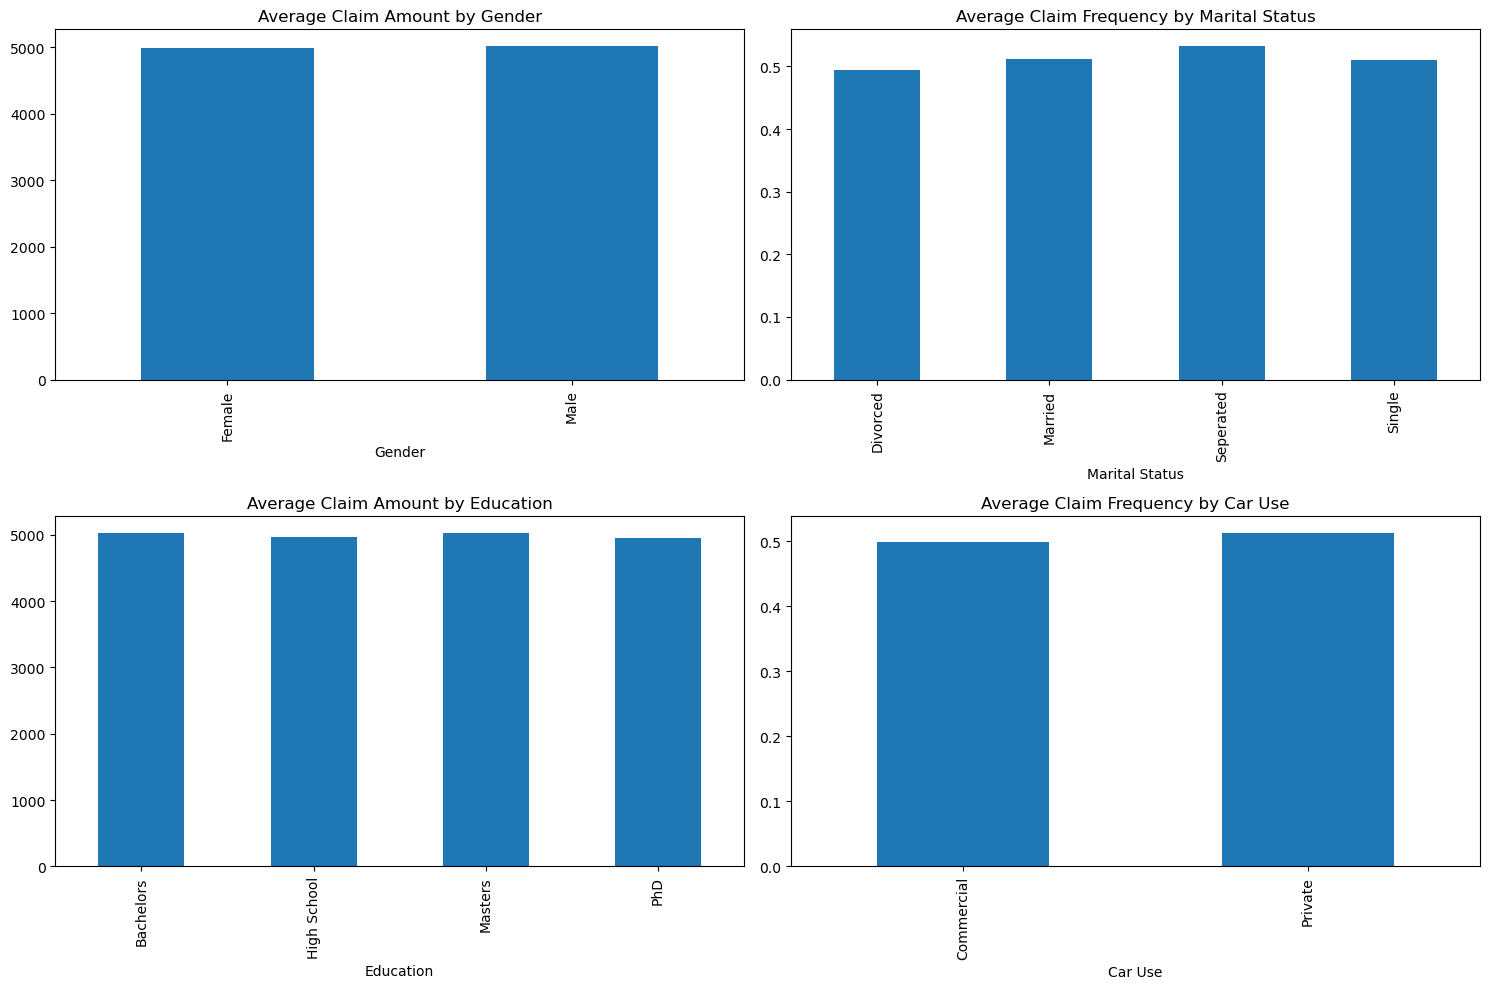

In [40]:
# Claim patterns by demographic factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Claims by Gender
df.groupby('Gender')['Claim Amount'].mean().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Average Claim Amount by Gender')

# Claims by Marital Status
df.groupby('Marital Status')['Claim Freq'].mean().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Claim Frequency by Marital Status')

# Claims by Education
df.groupby('Education')['Claim Amount'].mean().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Claim Amount by Education')

# Claims by Car Use
df.groupby('Car Use')['Claim Freq'].mean().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Average Claim Frequency by Car Use')

plt.tight_layout()
plt.show()

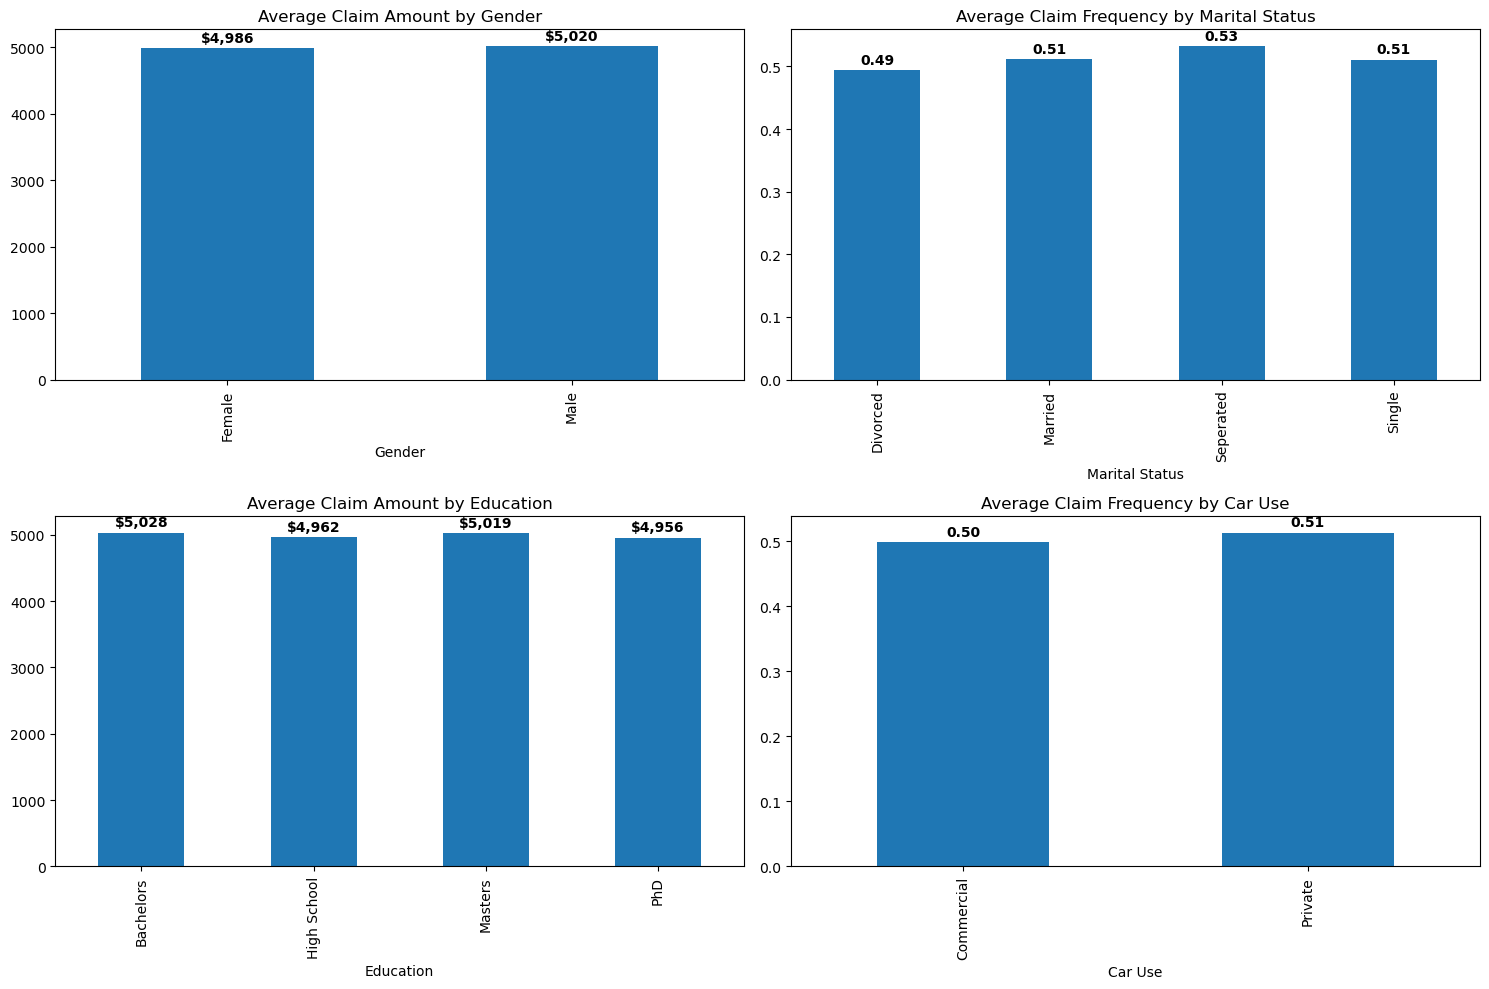

In [42]:
# Claim patterns by demographic factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Claims by Gender
gender_means = df.groupby('Gender')['Claim Amount'].mean()
bars1 = gender_means.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Average Claim Amount by Gender')
# Add data labels
for i, v in enumerate(gender_means):
    axes[0,0].text(i, v + max(gender_means)*0.01, f'${v:,.0f}', 
                  ha='center', va='bottom', fontweight='bold')

# Claims by Marital Status
marital_means = df.groupby('Marital Status')['Claim Freq'].mean()
bars2 = marital_means.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Claim Frequency by Marital Status')
# Add data labels
for i, v in enumerate(marital_means):
    axes[0,1].text(i, v + max(marital_means)*0.01, f'{v:.2f}', 
                  ha='center', va='bottom', fontweight='bold')

# Claims by Education
education_means = df.groupby('Education')['Claim Amount'].mean()
bars3 = education_means.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Claim Amount by Education')
# Add data labels
for i, v in enumerate(education_means):
    axes[1,0].text(i, v + max(education_means)*0.01, f'${v:,.0f}', 
                  ha='center', va='bottom', fontweight='bold')

# Claims by Car Use
car_use_means = df.groupby('Car Use')['Claim Freq'].mean()
bars4 = car_use_means.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Average Claim Frequency by Car Use')
# Add data labels
for i, v in enumerate(car_use_means):
    axes[1,1].text(i, v + max(car_use_means)*0.01, f'{v:.2f}', 
                  ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

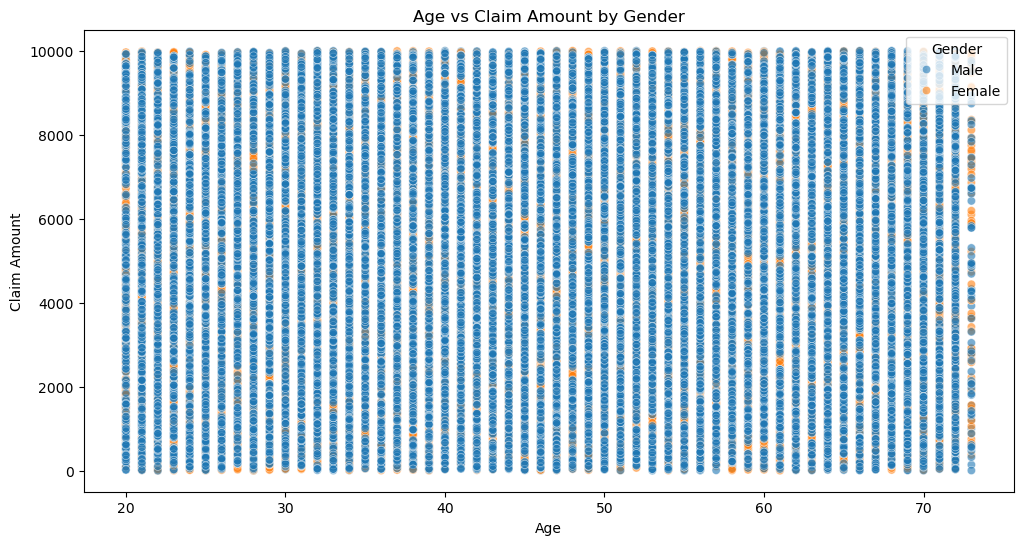

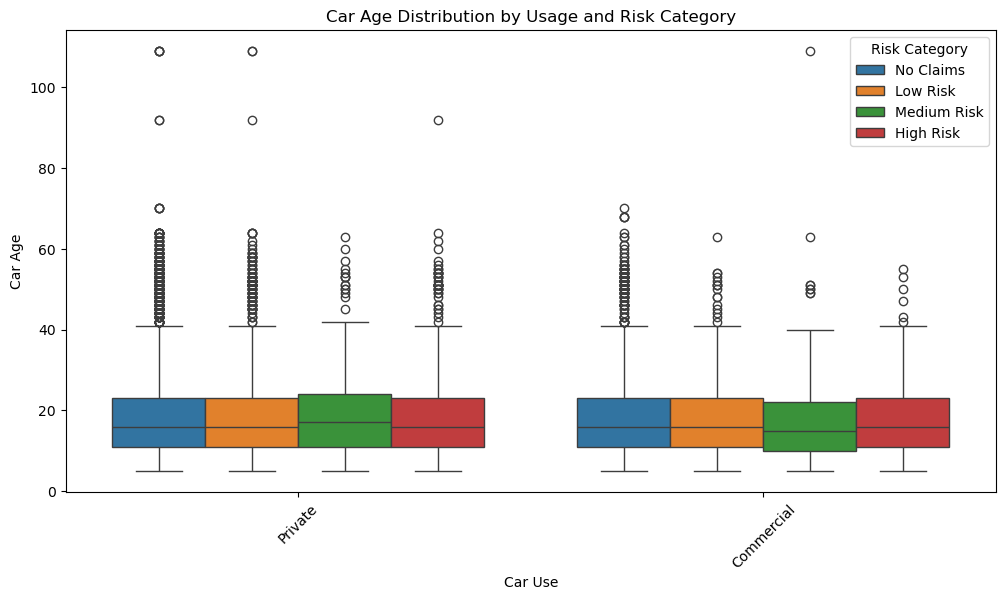

In [48]:
# Multivariate Analysis
# Age vs Claim Amount by Gender
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Claim Amount', hue='Gender', alpha=0.6)
plt.title('Age vs Claim Amount by Gender')
plt.show()

# Car Age vs Claim Frequency by Car Use
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Car Use', y='Car Age', hue='Risk Category')
plt.title('Car Age Distribution by Usage and Risk Category')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Advanced Analysis
# Risk Segmentation
# Create risk segments based on multiple factors
def create_risk_segment(row):
    if row['Claim Freq'] == 0:
        return 'No Claims'
    elif row['Age'] < 25 and row['Claim Freq'] > 0:
        return 'Young High Risk'
    elif row['Car Use'] == 'Commercial' and row['Claim Freq'] > 1:
        return 'Commercial High Risk'
    elif row['Kids Driving'] > 1 and row['Claim Freq'] > 0:
        return 'Family High Risk'
    elif row['Claim Freq'] == 1:
        return 'Low Risk'
    else:
        return 'Medium Risk'

df['Risk Segment'] = df.apply(create_risk_segment, axis=1)

# Analyze risk segments
risk_analysis = df.groupby('Risk Segment').agg({
    'Claim Amount': 'mean',
    'Claim Freq': 'mean',
    'Household Income': 'mean',
    'ID': 'count'
}).rename(columns={'ID': 'Count'}).sort_values('Claim Amount', ascending=False)

print("Risk Segment Analysis:")
print(risk_analysis)

Risk Segment Analysis:
                      Claim Amount  Claim Freq  Household Income  Count
Risk Segment                                                           
Family High Risk       5024.577681    1.723449     149097.852944    951
Low Risk               5021.775032    1.000000     146992.136201   4757
Young High Risk        5008.062901    1.857573     144994.426770    997
Commercial High Risk   4999.999172    3.015789     148145.218184    760
No Claims              4999.183690    0.000000     147365.445102  27203
Medium Risk            4998.002232    2.998608     146484.523055   2874


In [54]:
# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data for modeling
model_data = df.copy()

# First, let's check what categories actually exist in our data
print("Unique values in categorical columns:")
print("Gender:", df['Gender'].unique())
print("Marital Status:", df['Marital Status'].unique())
print("Car Use:", df['Car Use'].unique())
print("Coverage Zone:", df['Coverage Zone'].unique())

# Create dummy variables
model_data = pd.get_dummies(model_data, columns=['Gender', 'Marital Status', 'Car Use', 'Coverage Zone'])

# Check what columns were actually created
print("\nColumns after get_dummies:")
print(model_data.columns.tolist())

# Define features - use the actual columns that were created
# Let's dynamically create the feature list based on what exists
all_features = ['Age', 'Household Income', 'Car Age', 'Kids Driving']
categorical_features = []

# Check which dummy columns exist and add them to features
for col in model_data.columns:
    if col.startswith('Gender_'):
        categorical_features.append(col)
    elif col.startswith('Marital Status_'):
        categorical_features.append(col)
    elif col.startswith('Car Use_'):
        categorical_features.append(col)
    elif col.startswith('Coverage Zone_'):
        categorical_features.append(col)

features = all_features + categorical_features
target = 'Risk Category'

print(f"\nUsing features: {features}")

X = model_data[features]
y = model_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Unique values in categorical columns:
Gender: ['Male' 'Female']
Marital Status: ['Single' 'Married' 'Divorced' 'Seperated']
Car Use: ['Private' 'Commercial']
Coverage Zone: ['Highly Urban' 'Urban' 'Rural' 'Highly Rural' 'Suburban']

Columns after get_dummies:
['ID', 'BirthDate', 'Car Color', 'Car Make', 'Car Model', 'Car Year', 'Education', 'Parent', 'Claim Amount', 'Claim Freq', 'Household Income', 'Kids Driving', 'Age', 'Car Age', 'Claim Severity', 'Risk Category', 'Risk Segment', 'Gender_Female', 'Gender_Male', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Seperated', 'Marital Status_Single', 'Car Use_Commercial', 'Car Use_Private', 'Coverage Zone_Highly Rural', 'Coverage Zone_Highly Urban', 'Coverage Zone_Rural', 'Coverage Zone_Suburban', 'Coverage Zone_Urban']

Using features: ['Age', 'Household Income', 'Car Age', 'Kids Driving', 'Gender_Female', 'Gender_Male', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Seperated', 'Marital Status_